# 첫번째 EDA
- 최종수정일시 : 2021-05-10 (이해강)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

# matplotlib 한글 폰트 오류 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='appleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system.... sorry.....')

## 데이터 불러오기

In [3]:
df = pd.read_csv('실전db.csv',encoding='ansi')
ndf = df[:]

## 데이터 확인

In [4]:
ndf.head(5)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


## 컬럼 정의

- USER_ID : 사용자ID (약 16만건)
- JOIN_DATE : 가입일자
- D_TYPE : 구매타입(n시간권/ 당일권/ 월정액권)
- STORE_ID : 상품ID (1061종류)
- GOODS_TYPE : 상품타입 (4종류)
- DATE : 결제일 
- **COUNT : 결제건수** (Label)
- AD1 : 점포 주소 (85종류)

In [5]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [6]:
ndf.describe()

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


## 널 값 확인

In [8]:
ndf.isnull().sum()

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
dtype: int64

## 데이터 타입 변경

In [9]:
ndf = ndf.astype({'USER_ID':'str', 'STORE_ID':'str'})
ndf['DATE']=pd.to_datetime(ndf['DATE'])
ndf['JOIN_DATE']=pd.to_datetime(ndf['JOIN_DATE'])

## Label Encoding (문자 -> 숫자형)

In [10]:
# Feature Encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

ndf['D_TYPE'] = le.fit_transform(ndf['D_TYPE'])
ndf['GOODS_TYPE'] = le.fit_transform(ndf['GOODS_TYPE'])
ndf['AD1'] = le.fit_transform(ndf['AD1'])

print(ndf['D_TYPE'].unique())
print(ndf['GOODS_TYPE'].unique())
print(ndf['AD1'].unique())

[0 1 2]
[0 2 1 3]
[40 50 64 53 52 81 38 82 44 31  4 22  0 14 54 19 80 65 32 45 23 61 30 43
 37 63 48 56 46 51 33 36 39 12 67  7  5 29 47 13 57 34 49 20 35 28 77 21
  3 16 41 70  1 24 75  6 84 27 58  8 83 62 59 25 69  9 78 10 71 15 68 66
 60 11 17 73 74 55 26 76 42 79 18  2 72]


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     879271 non-null  object        
 1   JOIN_DATE   879271 non-null  datetime64[ns]
 2   D_TYPE      879271 non-null  int32         
 3   STORE_ID    879271 non-null  object        
 4   GOODS_TYPE  879271 non-null  int32         
 5   DATE        879271 non-null  datetime64[ns]
 6   COUNT       879271 non-null  int64         
 7   AD1         879271 non-null  int32         
dtypes: datetime64[ns](2), int32(3), int64(1), object(2)
memory usage: 43.6+ MB


## 필요없는 컬럼 제거

In [12]:
ndf.drop(['USER_ID','JOIN_DATE','STORE_ID'],axis=1,inplace=True)

## 변수별 상관관계 히트맵
- label인 count와 강한 상관관계를 보이는 변수는 없음

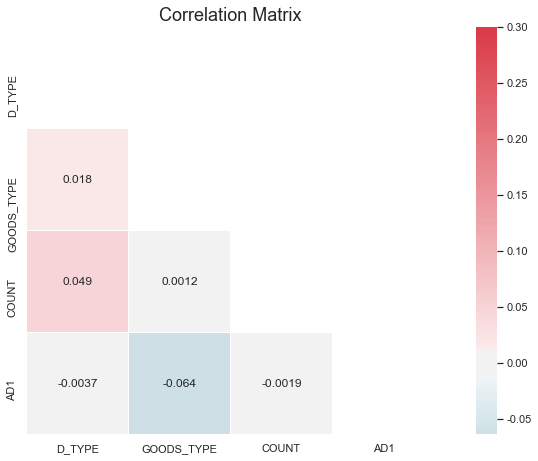

In [13]:
sns.set(style="white")
corr = ndf.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 7.5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)
plt.show()

## 변수별 시각화

Text(0.5, 1, 'count and ad1')

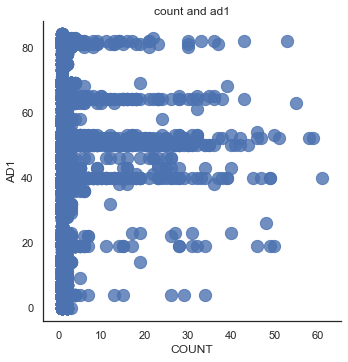

In [14]:
sns.lmplot(x='COUNT', y='AD1', data=ndf,
           fit_reg=False,
           scatter_kws={'s':150}           
           )

plt.title('count and ad1')

Text(0.5, 1, 'count and d_type')

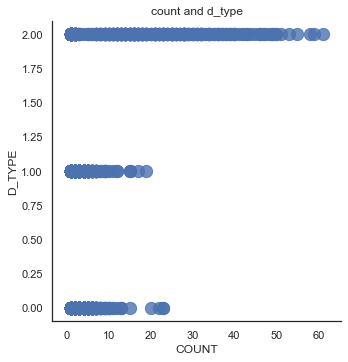

In [15]:
sns.lmplot(x='COUNT', y='D_TYPE', data=ndf,
           fit_reg=False,
           scatter_kws={'s':150}           
           )

plt.title('count and d_type')

Text(0.5, 1, 'count and goods_type')

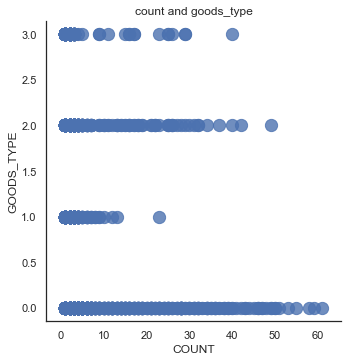

In [16]:
sns.lmplot(x='COUNT', y='GOODS_TYPE', data=ndf,
           fit_reg=False,
           scatter_kws={'s':150}           
           )

plt.title('count and goods_type')

## 하루 판매 기준 1년치 그래프

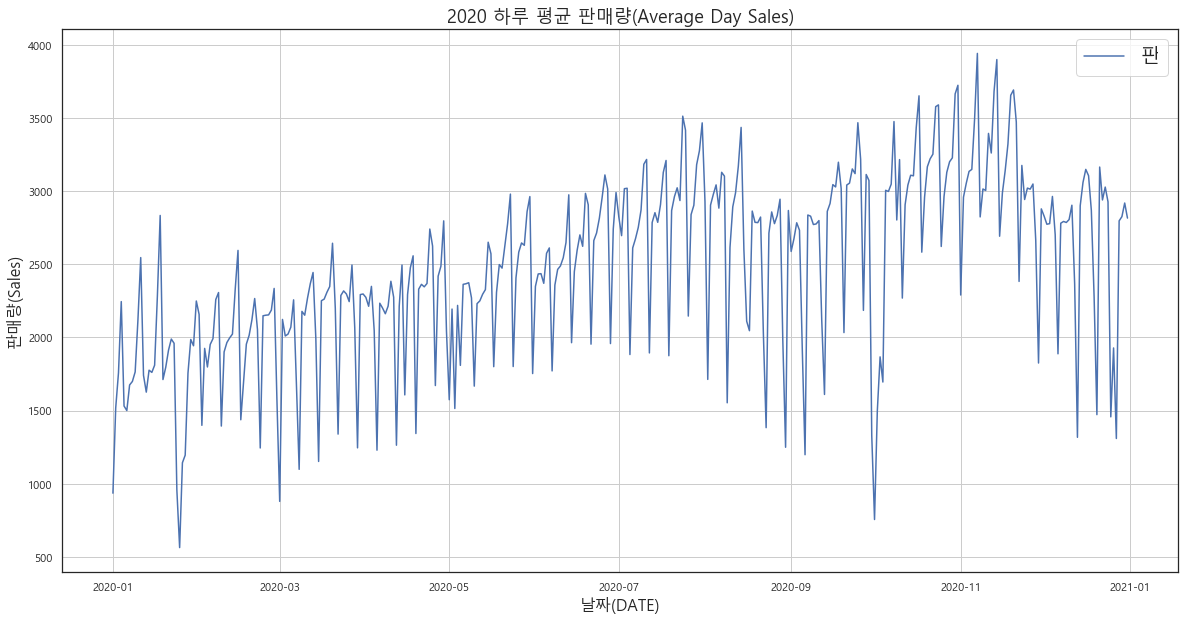

In [19]:
sales_2020 = ndf.groupby(ndf['DATE'])['COUNT'].sum()
plt.figure(figsize=(20,10))
sns.lineplot(sales_2020.index, sales_2020.values)
plt.grid()
plt.legend('판매량',loc='best', fontsize=20)
plt.title('2020 하루 평균 판매량(Average Day Sales)', fontsize=18)
plt.ylabel('판매량(Sales)', fontsize=16)
plt.xlabel('날짜(DATE)', fontsize=16)
plt.show()

## 요일 컬럼 생성

In [78]:
"""
num_to_day = {
    0 : '월요일',
    1 : '화요일',
    2 : '수요일',
    3 : '목요일',
    4 : '금요일',
    5 : '토요일',
    6 : '일요일',
}
ndf['Day'] = [num_to_day[k] for k in ndf['DATE'].dt.dayofweek] ## 요일 칼럼
"""

,D_TYPE,GOODS_TYPE,DATE,COUNT,AD1,Day
0,0,0,2020-01-01,1,40,수요일
1,1,0,2020-01-01,1,50,수요일
2,1,0,2020-01-01,1,64,수요일
3,1,2,2020-01-01,1,53,수요일
4,0,2,2020-01-01,1,52,수요일
...,...,...,...,...,...,...
879266,1,1,2020-12-31,1,40,목요일
879267,1,1,2020-12-31,1,19,목요일
879268,0,1,2020-12-31,1,52,목요일
879269,1,1,2020-12-31,1,50,목요일


In [20]:
ndf['Day'] = [k for k in ndf['DATE'].dt.dayofweek] ## 요일 칼럼
ndf

,D_TYPE,GOODS_TYPE,DATE,COUNT,AD1,Day
0,0,0,2020-01-01,1,40,2
1,1,0,2020-01-01,1,50,2
2,1,0,2020-01-01,1,64,2
3,1,2,2020-01-01,1,53,2
4,0,2,2020-01-01,1,52,2
...,...,...,...,...,...,...
879266,1,1,2020-12-31,1,40,3
879267,1,1,2020-12-31,1,19,3
879268,0,1,2020-12-31,1,52,3
879269,1,1,2020-12-31,1,50,3


## 주말 컬럼 생성 (0: 평일, 1: 주말)

In [43]:
IS_HOLIDAY = []
for i in ndf.Day:
    if i == 5 or i == 6:
        IS_HOLIDAY.append(1)
    else:
        IS_HOLIDAY.append(0)
ndf['IS_HOLIDAY'] = IS_HOLIDAY
ndf

,D_TYPE,GOODS_TYPE,DATE,COUNT,AD1,Day,IS_HOLIDAY
0,0,0,2020-01-01,1,40,2,0
1,1,0,2020-01-01,1,50,2,0
2,1,0,2020-01-01,1,64,2,0
3,1,2,2020-01-01,1,53,2,0
4,0,2,2020-01-01,1,52,2,0
...,...,...,...,...,...,...,...
879266,1,1,2020-12-31,1,40,3,0
879267,1,1,2020-12-31,1,19,3,0
879268,0,1,2020-12-31,1,52,3,0
879269,1,1,2020-12-31,1,50,3,0


In [56]:
#target_date = ['2020-01-01','2020-01-24','2020-04-30','2020-05-05','2020-08-17','2020-09-30','2020-10-01','2020-10-02','2020-10-09','2020-12-25']

## 주말과 요일과의 상관관계

In [22]:
ndf.corr()

,D_TYPE,GOODS_TYPE,COUNT,AD1,Day,IS_HOLIDAY
D_TYPE,1.000000,0.018306,0.049195,-0.003713,0.002042,-0.000350
GOODS_TYPE,0.018306,1.000000,0.001226,-0.063796,-0.013545,-0.036881
COUNT,0.049195,0.001226,1.000000,-0.001853,0.003786,0.004417
AD1,-0.003713,-0.063796,-0.001853,1.000000,-0.009855,-0.010335
Day,0.002042,-0.013545,0.003786,-0.009855,1.000000,0.757183
IS_HOLIDAY,-0.000350,-0.036881,0.004417,-0.010335,0.757183,1.000000


Text(0.5, 1, 'count and is_holiday')

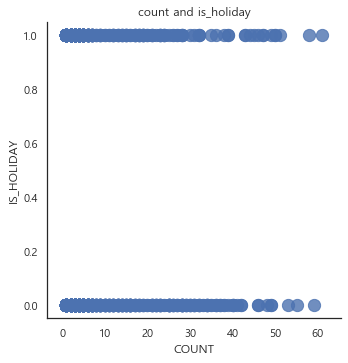

In [23]:
sns.lmplot(x='COUNT', y='IS_HOLIDAY', data=ndf,
           fit_reg=False,
           scatter_kws={'s':150}           
           )

plt.title('count and is_holiday')

Text(0.5, 1, 'count and day')

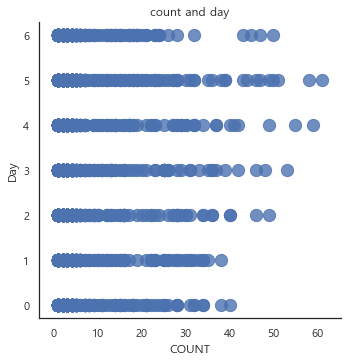

In [24]:
sns.lmplot(x='COUNT', y='Day', data=ndf,
           fit_reg=False,
           scatter_kws={'s':150}           
           )

plt.title('count and day')